Implement a KNN model to classify the animals in to categorie

In [1]:
import pandas as pd
import numpy as np

In [2]:
zoo = pd.read_csv('zoo.csv')
zoo.head(10)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [3]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal name    101 non-null object
hair           101 non-null int64
feathers       101 non-null int64
eggs           101 non-null int64
milk           101 non-null int64
airborne       101 non-null int64
aquatic        101 non-null int64
predator       101 non-null int64
toothed        101 non-null int64
backbone       101 non-null int64
breathes       101 non-null int64
venomous       101 non-null int64
fins           101 non-null int64
legs           101 non-null int64
tail           101 non-null int64
domestic       101 non-null int64
catsize        101 non-null int64
type           101 non-null int64
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [4]:
zoo.drop(["animal name"],inplace=True ,axis=1)

zoo.head(10)
# the data here is not much fluctuated so we can ignore normalisation for this data set

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [5]:
# Training and Test data using 
from sklearn.model_selection import train_test_split
train,test = train_test_split(zoo,test_size = 0.2) # 0.2 => 20 percent of entire data 

In [6]:
 zoo.iloc[:,0:16] #=> x values 

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [9]:
 zoo.iloc[:,16] 
# y values => type

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [10]:
# KNN using sklearn 
# Importing Knn algorithm from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier as KNC

# for 1 nearest neighbours 
zoo_model = KNC(n_neighbors= 1)

# Fitting with training data 
# model.fit(x,y)

zoo_model.fit(train.iloc[:,0:16],train.iloc[:,16])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [11]:
# train accuracy 
train_acc = np.mean(zoo_model.predict(train.iloc[:,0:16])==train.iloc[:,16])
print(train_acc)

# test accuracy
test_acc = np.mean(zoo_model.predict(test.iloc[:,0:16])==test.iloc[:,16])
print(test_acc)

# we are geeting close values of of test and train dataset
# which means there is no presence of overfitting and underfitting

1.0
0.9523809523809523


In [ ]:
# Here the accuracy we got is acceptable may
# now rather than performing again and again with diff k values we can apply a loop function for diffrent k values
# and plot it to xamine the stable k value

In [18]:
# creating empty list variable 
acc = []

# running KNN algorithm for 3 to 50 nearest neighbours(odd numbers) and 
# storing the accuracy values 
 
for i in range(1,50,2):
    zoo_model = KNC(n_neighbors=i)
    zoo_model.fit(train.iloc[:,0:16],train.iloc[:,16])
    train_acc = np.mean(zoo_model.predict(train.iloc[:,0:16])==train.iloc[:,16])
    test_acc = np.mean(zoo_model.predict(test.iloc[:,0:16])==test.iloc[:,16])
    acc.append([train_acc,test_acc])


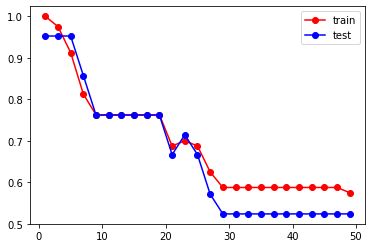

In [20]:
import matplotlib.pyplot as plt # library to do visualizations 

# train accuracy plot 
plt.plot(np.arange(1,50,2),[i[0] for i in acc],"ro-")

# test accuracy plot
plt.plot(np.arange(1,50,2),[i[1] for i in acc],"bo-")


plt.legend(["train","test"])
plt.show()



In [ ]:
# by above plot we can say somewhere in between 5-10 we can get a good accuracy k value and 
# 10-18 we have a stable accuracy for both test and train data

In [21]:
# KNN using sklearn 
# Importing Knn algorithm from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier as KNC

# for 10 nearest neighbours 
zoo_model = KNC(n_neighbors= 10)

# Fitting with training data 
# model.fit(x,y)

zoo_model.fit(train.iloc[:,0:16],train.iloc[:,16])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [22]:
# train accuracy 
train_acc = np.mean(zoo_model.predict(train.iloc[:,0:16])==train.iloc[:,16])
print(train_acc)

# test accuracy
test_acc = np.mean(zoo_model.predict(test.iloc[:,0:16])==test.iloc[:,16])
print(test_acc)

# we are geeting close values of of test and train dataset
# which means there is no presence of overfitting and underfitting

0.7625
0.7619047619047619


In [29]:
# KNN using sklearn 
# Importing Knn algorithm from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier as KNC

# for 5 nearest neighbours 
zoo_model = KNC(n_neighbors= 5)

# Fitting with training data 
# model.fit(x,y)

zoo_model.fit(train.iloc[:,0:16],train.iloc[:,16])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [30]:
# train accuracy 
train_acc = np.mean(zoo_model.predict(train.iloc[:,0:16])==train.iloc[:,16])
print(train_acc)

# test accuracy
test_acc = np.mean(zoo_model.predict(test.iloc[:,0:16])==test.iloc[:,16])
print(test_acc)

# we are geeting close values of of test and train dataset
# which means there is no presence of overfitting and underfitting

0.9125
0.9523809523809523


In [ ]:
# At k=5 we get our best accuracy values for both test and train